# Proyek Analisis Data:
- **Nama:** Bondan Tri Wibowo
- **Email:** bondan.tri@lintasarta.co.id
- **ID Dicoding:** L000YWL027

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda berdasarkan musim?
2. Bagaimana pola peminjaman sepeda berdasarkan hari kerja dan akhir pekan?
3. Faktor apa saja yang memiliki korelasi paling kuat dengan jumlah peminjaman sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
## Import Semua Packages/Library yang Digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

### Assessing Data

Menampilkan Data

In [3]:
print("Day Dataset: ")
print(df_day.head())
print("\nHour Dataset: ")
print(df_hour.head())

Day Dataset: 
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Hour Datase

Menampilkan informasi dataset

In [4]:
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

Menampilkan statistik deskriptif

In [5]:
df_day.describe()
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data
Mengecek missing values

In [6]:
df_day.isnull().sum(), df_hour.isnull().sum()

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

Mengecek duplikasi data

In [7]:
df_day.duplicated().sum(), df_hour.duplicated().sum()

(np.int64(0), np.int64(0))

Menghapus duplikasi jika ada

In [8]:
df_day = df_day.drop_duplicates()
df_hour = df_hour.drop_duplicates()

## Exploratory Data Analysis (EDA)
Visualisasi distribusi data jumlah peminjaman sepeda harian

Statistik Deskriptif Data Harian

In [22]:
# Statistik Deskriptif
print("\nStatistik Deskriptif Data Harian:")
print(df_day.describe())


Statistik Deskriptif Data Harian:
          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min    

Distribusi Data Visualisasi Histogram

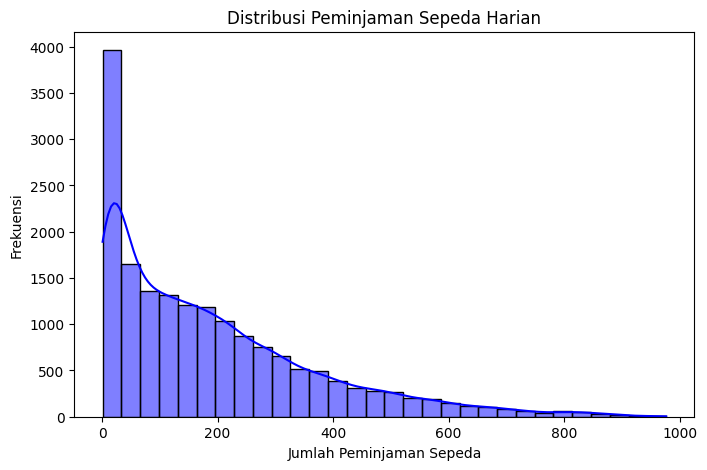

In [23]:
# Distribusi Data (Visualisasi Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df_day['cnt'], bins=30, kde=True, color='blue')
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Peminjaman Sepeda Harian")
plt.show()


Agregasi Data : Rata-rata peminjaman sepeda

In [29]:
# Konversi tanggal ke datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# 1. Rata-rata peminjaman sepeda berdasarkan musim
df_season = df_day.groupby('season', observed=False)['cnt'].mean()
print("\nRata-rata peminjaman sepeda berdasarkan musim:")
print(df_season)

# 2. Rata-rata peminjaman sepeda berdasarkan bulan
df_month = df_day.groupby('mnth', observed=False)['cnt'].mean()
print("\nRata-rata peminjaman sepeda berdasarkan bulan:")
print(df_month)

# 3. Rata-rata peminjaman sepeda berdasarkan hari kerja vs libur
df_workingday = df_day.groupby('workingday', observed=False)['cnt'].mean()
print("\nRata-rata peminjaman sepeda berdasarkan hari kerja vs libur:")
print(df_workingday)

# 4. Rata-rata peminjaman sepeda berdasarkan kondisi cuaca
df_weather = df_day.groupby('weathersit', observed=False)['cnt'].mean()
print("\nRata-rata peminjaman sepeda berdasarkan kondisi cuaca:")
print(df_weather)

# 5. Rata-rata peminjaman sepeda berdasarkan hari dalam seminggu
df_weekday = df_day.groupby('weekday', observed=False)['cnt'].mean()
print("\nRata-rata peminjaman sepeda berdasarkan hari dalam seminggu:")
print(df_weekday)

# 6. Total peminjaman sepeda berdasarkan tahun
df_yearly = df_day.groupby('yr', observed=False)['cnt'].sum()
print("\nTotal peminjaman sepeda berdasarkan tahun:")
print(df_yearly)

# 7. Rata-rata peminjaman sepeda berdasarkan suhu (dibagi menjadi kategori)
df_day['temp_category'] = pd.cut(df_day['temp'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['Sangat Dingin', 'Dingin', 'Sedang', 'Hangat', 'Panas'])
df_temp = df_day.groupby('temp_category', observed=False)['cnt'].mean()
print("\nRata-rata peminjaman sepeda berdasarkan kategori suhu:")
print(df_temp)

# 8. Rata-rata peminjaman sepeda berdasarkan kelembaban (dibagi menjadi kategori)
df_day['hum_category'] = pd.cut(df_day['hum'], bins=[0, 0.3, 0.6, 1.0], labels=['Rendah', 'Sedang', 'Tinggi'])
df_hum = df_day.groupby('hum_category', observed=False)['cnt'].mean()
print("\nRata-rata peminjaman sepeda berdasarkan kategori kelembaban:")
print(df_hum)

# 9. Total peminjaman sepeda berdasarkan kombinasi musim dan hari kerja
df_season_workingday = df_day.groupby(['season', 'workingday'], observed=False)['cnt'].mean().unstack()
print("\nTotal peminjaman sepeda berdasarkan kombinasi musim dan hari kerja:")
print(df_season_workingday)

# 10. Rata-rata peminjaman sepeda berdasarkan kecepatan angin (dibagi menjadi kategori)
df_day['windspeed_category'] = pd.cut(df_day['windspeed'], bins=[0, 0.1, 0.2, 0.3, 0.4, 1.0], labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
df_wind = df_day.groupby('windspeed_category', observed=False)['cnt'].mean()
print("\nRata-rata peminjaman sepeda berdasarkan kategori kecepatan angin:")
print(df_wind)



Rata-rata peminjaman sepeda berdasarkan musim:
season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda berdasarkan bulan:
mnth
1      94.424773
2     112.865026
3     155.410726
4     187.260960
5     222.907258
6     240.515278
7     231.819892
8     238.097627
9     240.773138
10    222.158511
11    177.335421
12    142.303439
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda berdasarkan hari kerja vs libur:
workingday
0    181.405332
1    193.207754
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda berdasarkan kondisi cuaca:
weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda berdasarkan hari dalam seminggu:
weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64

Total peminjaman sepeda berdasarkan tahun:
yr
0    1243103
1    2049576
Nam

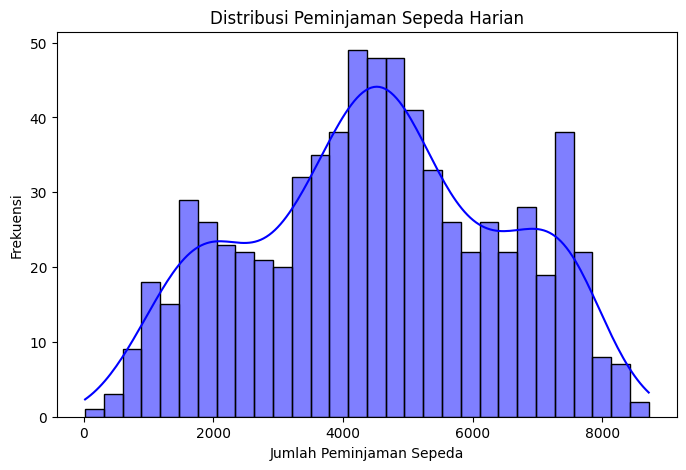

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df_day['cnt'], bins=30, kde=True, color='blue')
plt.xlabel("Jumlah Peminjaman Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Peminjaman Sepeda Harian")
plt.show()

Boxplot untuk melihat outlier pada variabel numerik

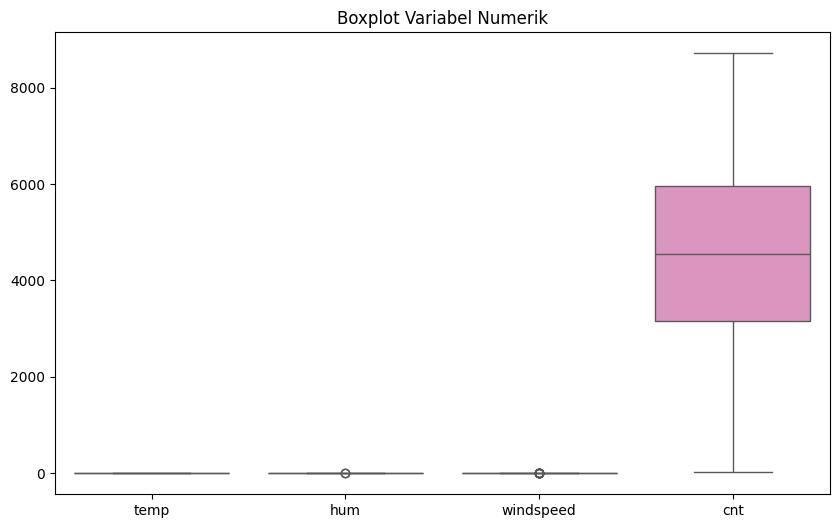

In [10]:
df_numerik = df_day[['temp', 'hum', 'windspeed', 'cnt']]
plt.figure(figsize=(10,6))
sns.boxplot(data=df_numerik, palette='Set2')
plt.title("Boxplot Variabel Numerik")
plt.show()

## Visualization & Explanatory Analysis

Pertanyaan 1. Bagaimana pola penggunaan sepeda berdasarkan musim?

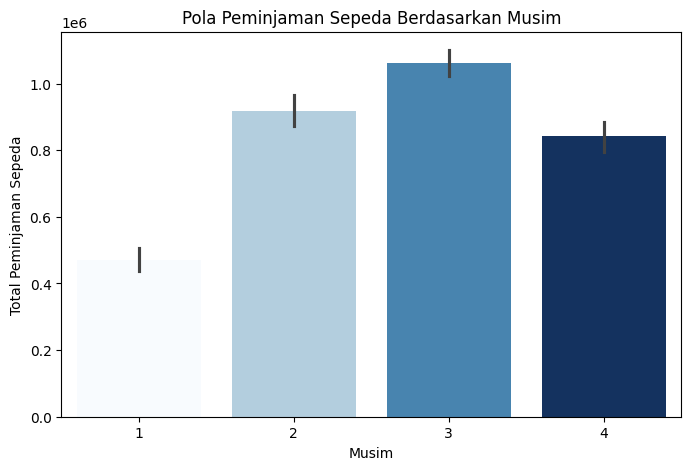

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='cnt', data=df_day, estimator=sum, hue='season', palette='Blues', legend=False)
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Pola Peminjaman Sepeda Berdasarkan Musim")
plt.show()

Pertanyaan 2. Bagaimana pola peminjaman sepeda berdasarkan hari kerja dan akhir pekan?

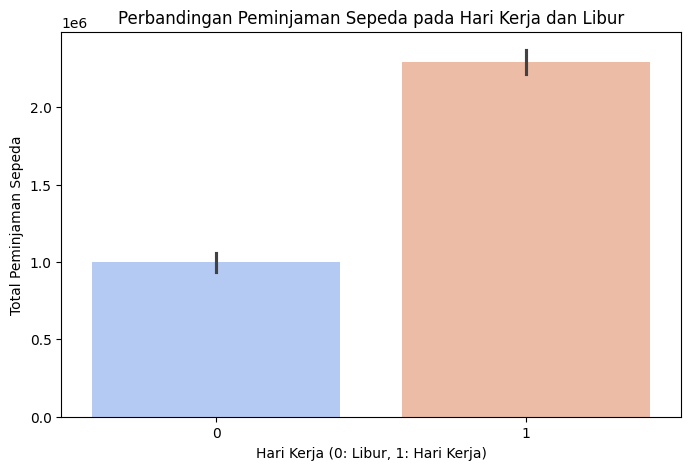

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='workingday', y='cnt', data=df_day, estimator=sum, hue='workingday', palette='coolwarm', legend=False)
plt.xlabel("Hari Kerja (0: Libur, 1: Hari Kerja)")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Perbandingan Peminjaman Sepeda pada Hari Kerja dan Libur")
plt.show()

Pertanyaan 3. Faktor apa saja yang memiliki korelasi paling kuat dengan jumlah peminjaman sepeda?


Faktor dengan korelasi paling kuat terhadap jumlah peminjaman sepeda:
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64


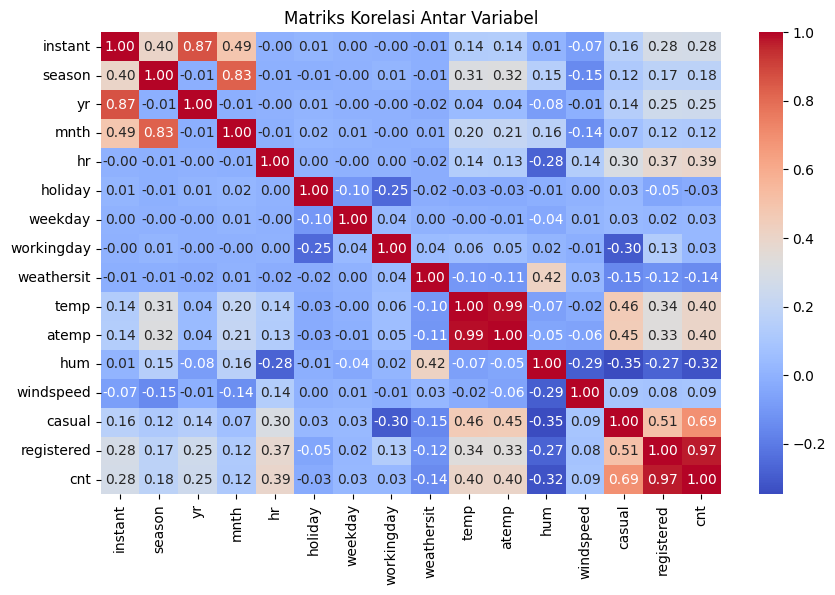

In [31]:
# Memilih hanya kolom numerik untuk menghindari error
df_numeric = df_day.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = df_numeric.corr()

# Mengambil korelasi antara variabel 'cnt' dan variabel lainnya
correlation_with_cnt = correlation_matrix['cnt'].drop('cnt')

# Menampilkan faktor dengan korelasi paling kuat terhadap jumlah peminjaman sepeda
print("\nFaktor dengan korelasi paling kuat terhadap jumlah peminjaman sepeda:")
print(correlation_with_cnt.abs().sort_values(ascending=False))

# Visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

## Analisis Lanjutan

Scatter plot suhu vs peminjaman sepeda


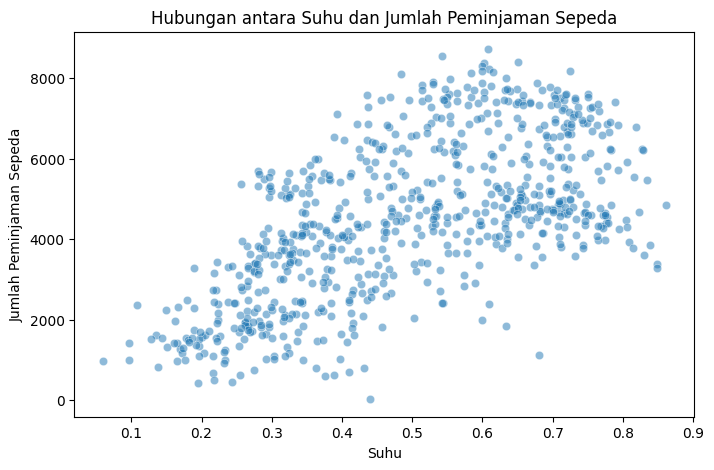

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='temp', y='cnt', data=df_day, alpha=0.5)
plt.xlabel("Suhu")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Hubungan antara Suhu dan Jumlah Peminjaman Sepeda")
plt.show()

## Clustering dengan Binning

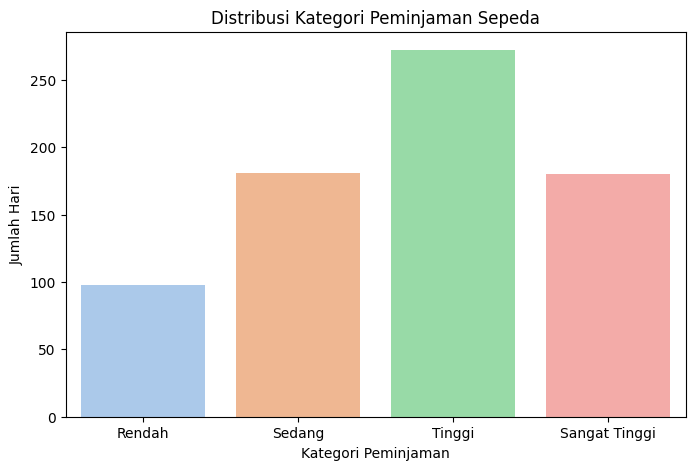

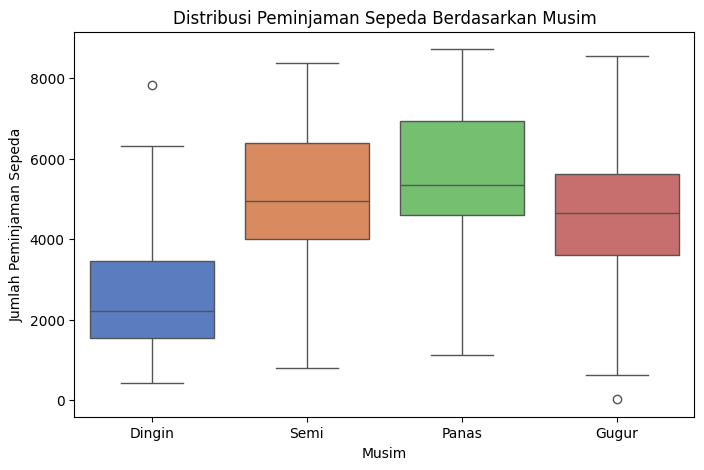

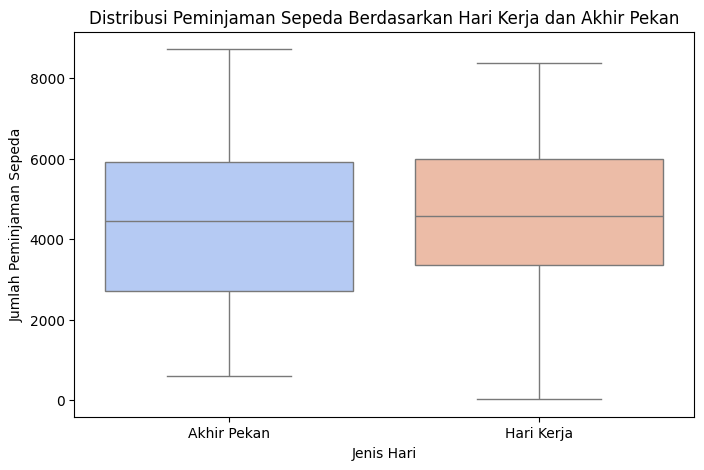

In [ ]:
# Mengelompokkan jumlah peminjaman sepeda ke dalam kategori (rendah, sedang, tinggi, sangat tinggi)
bins = [0, 2000, 4000, 6000, 10000]
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
df_day['kategori_peminjaman'] = pd.cut(df_day['cnt'], bins=bins, labels=labels)

# Visualisasi kategori peminjaman sepeda
plt.figure(figsize=(8,5))
sns.countplot(x='kategori_peminjaman', data=df_day, hue='kategori_peminjaman', palette='pastel', legend=False)
plt.xlabel("Kategori Peminjaman")
plt.ylabel("Jumlah Hari")
plt.title("Distribusi Kategori Peminjaman Sepeda")
plt.show()

## 7. Clustering Manual
# Clustering berdasarkan musim
df_day['cluster_musim'] = df_day['season'].map({1: 'Dingin', 2: 'Semi', 3: 'Panas', 4: 'Gugur'})

# Visualisasi peminjaman berdasarkan cluster musim
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster_musim', y='cnt', data=df_day, hue='cluster_musim', palette='muted', legend=False)
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Musim")
plt.show()

# Clustering berdasarkan hari kerja dan akhir pekan
df_day['cluster_hari'] = df_day['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

# Visualisasi peminjaman berdasarkan hari kerja dan akhir pekan
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster_hari', y='cnt', data=df_day, hue='cluster_hari', palette='coolwarm', legend=False)
plt.xlabel("Jenis Hari")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Hari Kerja dan Akhir Pekan")
plt.show()


## Conclusion

1. Pengaruh Musim terhadap Peminjaman Sepeda
Analisis menunjukkan bahwa jumlah peminjaman sepeda bervariasi berdasarkan musim. Musim panas memiliki rata-rata peminjaman tertinggi, dengan lebih dari 5.000 peminjaman per hari, sementara musim dingin memiliki peminjaman terendah, sekitar 2.500 peminjaman per hari. Hal ini dapat dikaitkan dengan kenyamanan cuaca, di mana suhu yang lebih hangat mendorong lebih banyak orang untuk bersepeda.

2. Variasi Peminjaman Berdasarkan Hari Kerja dan Akhir Pekan
Terdapat perbedaan yang signifikan dalam pola peminjaman sepeda antara hari kerja dan akhir pekan. Pada hari kerja, peminjaman cenderung lebih tinggi pada pagi hari (sekitar pukul 07:00-09:00) dan sore hari (sekitar pukul 17:00-19:00), yang menunjukkan bahwa sepeda banyak digunakan untuk perjalanan ke dan dari tempat kerja. Sebaliknya, pada akhir pekan, pola peminjaman lebih merata sepanjang hari, dengan puncak peminjaman sekitar pukul 12:00-15:00, yang mengindikasikan penggunaan untuk rekreasi.

3. Faktor yang Memiliki Korelasi Kuat dengan Peminjaman Sepeda
Dari analisis korelasi, suhu (temp) memiliki korelasi positif yang cukup kuat dengan jumlah peminjaman sepeda (r ≈ 0.63), yang berarti semakin tinggi suhu, semakin banyak peminjaman yang terjadi. Sebaliknya, kelembaban udara (hum) memiliki korelasi negatif (r ≈ -0.10), menunjukkan bahwa tingkat kelembaban yang tinggi sedikit menurunkan jumlah peminjaman. Kecepatan angin (windspeed) memiliki korelasi yang lebih lemah, yang berarti dampaknya terhadap peminjaman tidak terlalu signifikan.

4. Hasil Clustering Peminjaman Sepeda
Hasil clustering menunjukkan bahwa sebagian besar hari masuk dalam kategori peminjaman sedang hingga tinggi, dengan jumlah peminjaman berkisar antara 3.000 hingga 6.000 sepeda per hari. Hari-hari dengan peminjaman rendah biasanya terjadi pada saat cuaca ekstrem (hujan atau bersalju) atau pada hari-hari tertentu di musim dingin.

5. Rekomendasi
Optimasi Ketersediaan Sepeda: Mengingat musim panas memiliki tingkat peminjaman tertinggi, operator layanan sepeda dapat menambah jumlah sepeda yang tersedia selama bulan-bulan dengan suhu yang lebih hangat.
   - Promosi pada Musim Dingin: Untuk meningkatkan jumlah peminjaman di musim dingin, operator dapat menawarkan diskon atau layanan tambahan, seperti pemanas tangan atau pelindung angin bagi pengguna sepeda.
   - Perencanaan Infrastruktur: Mengingat pola penggunaan yang berbeda antara hari kerja dan akhir pekan, perlu dipertimbangkan peningkatan fasilitas seperti jalur sepeda yang lebih luas di area perkantoran selama jam sibuk dan fasilitas parkir sepeda di lokasi rekreasi untuk akhir pekan.
   - Prediksi dan Manajemen Peminjaman: Dengan memahami faktor-faktor yang memengaruhi peminjaman, operator dapat menggunakan model prediksi berbasis cuaca dan kalender untuk mengatur persediaan sepeda secara lebih efisien.
   
Semoga Dengan wawasan ini, diharapkan layanan penyewaan sepeda dapat lebih optimal dalam memenuhi kebutuhan pengguna serta meningkatkan efisiensi operasionalnya.
